# WeatherPy
----

### Analysis
* The temperature is significantly warmer near the equator. The data also implies that the northern hemisphere has colder temperatures at this time of year than the southern hemisphere, specifically, north of 40 degrees latitude However, I would assume this is because there is far less land south of -40 degrees latitude than compared to north of 40 degrees latitude. Thus, it's likely just as warm that far south and the data should take that into account when looking at correlations.
* There is no strong correlation between latitude and cloudiness.
* There is no strong correlation between latitude and wind speed. However, the higher wind speeds found are farther away from the equator. North of 60 degrees latitude is where highest wind speeds are found. Again, we need to remember that there is far less land (cities) to track at the same latitude below the equator.
* There is no strong correlation between latitude and humidity. There wass an outlier in the data on 3/19/19. It seems this outlier could be bad data as I've looked at the average humidity levels in Peru to determine if this level seems plausible. Thus, I re-ran the humidity chart a second time removing the outliers. (For reference: https://www.worldweatheronline.com/paita-weather-averages/piura/pe.aspx).  Further, the data indicates that there is an pretty even distribution of 100% humidity from -40 degrees to at least 70 degrees latitude. It would be interesting to do further analysis to determine if these cities are all coastal or have another correlating factor.

(Please note that the data changes day to day and, thus, I'm not including the second humidity graph without the outliers as it no longer appears when I submitted the homework.) 

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#empty lists
names=[]
countries=[]
temps=[]
humidities=[]
cloudiness=[]
wind_speeds=[]
latitudes=[]
longitudes=[]
dates=[]

#define counter
counter = 1

for city in cities:
    
    try:
    
        print(f"Retrieving Record {counter}: {city}")
        response = requests.get(query_url + str(city)).json()
        names.append(response['name'])
        countries.append(response['sys']['country'])
        temps.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        latitudes.append(response['coord']['lat'])
        longitudes.append(response['coord']['lon'])
        dates.append(response['dt'])
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    counter += 1
    
print("-"*50)
print("Date Retreival Complete")
print("-"*50)

Retrieving Record 1: cururupu
Retrieving Record 2: tahoua
Retrieving Record 3: port-gentil
Retrieving Record 4: eureka
Retrieving Record 5: anqing
Retrieving Record 6: kandi
Retrieving Record 7: rikitea
Retrieving Record 8: hermanus
Retrieving Record 9: bredasdorp
Retrieving Record 10: deputatskiy
Retrieving Record 11: jamestown
Retrieving Record 12: busselton
Retrieving Record 13: okhotsk
Retrieving Record 14: kapaa
Retrieving Record 15: pontivy
Retrieving Record 16: hobart
Retrieving Record 17: knysna
Retrieving Record 18: barentsburg
Missing field/result... skipping.
Retrieving Record 19: vardo
Retrieving Record 20: tura
Retrieving Record 21: los llanos de aridane
Retrieving Record 22: qeshm
Retrieving Record 23: taolanaro
Missing field/result... skipping.
Retrieving Record 24: itarema
Retrieving Record 25: amderma
Missing field/result... skipping.
Retrieving Record 26: barrow
Retrieving Record 27: bairiki
Missing field/result... skipping.
Retrieving Record 28: tyazhinskiy
Retrievin

Retrieving Record 232: henties bay
Retrieving Record 233: portland
Retrieving Record 234: shenjiamen
Retrieving Record 235: port lincoln
Retrieving Record 236: saldanha
Retrieving Record 237: ilhabela
Retrieving Record 238: burglengenfeld
Retrieving Record 239: roebourne
Retrieving Record 240: cuitareo
Retrieving Record 241: pandan
Retrieving Record 242: mount isa
Retrieving Record 243: san quintin
Retrieving Record 244: biak
Retrieving Record 245: kedrovyy
Retrieving Record 246: san patricio
Retrieving Record 247: kenai
Retrieving Record 248: pacific grove
Retrieving Record 249: luderitz
Retrieving Record 250: caravelas
Retrieving Record 251: kijang
Retrieving Record 252: korla
Missing field/result... skipping.
Retrieving Record 253: oga
Retrieving Record 254: puerto ayora
Retrieving Record 255: hithadhoo
Retrieving Record 256: sabzevar
Retrieving Record 257: srednekolymsk
Retrieving Record 258: zouxian
Missing field/result... skipping.
Retrieving Record 259: muroto
Retrieving Record 

Retrieving Record 464: hutchinson
Retrieving Record 465: ashcroft
Retrieving Record 466: mangai
Retrieving Record 467: mocambique
Missing field/result... skipping.
Retrieving Record 468: luchegorsk
Retrieving Record 469: fort nelson
Retrieving Record 470: lujan
Retrieving Record 471: maturin
Retrieving Record 472: tezu
Retrieving Record 473: gravdal
Retrieving Record 474: luganville
Retrieving Record 475: halalo
Missing field/result... skipping.
Retrieving Record 476: miri
Retrieving Record 477: chapais
Retrieving Record 478: labuhan
Retrieving Record 479: terrace
Retrieving Record 480: palauig
Retrieving Record 481: beloha
Retrieving Record 482: kiama
Retrieving Record 483: acapulco
Retrieving Record 484: san rafael
Retrieving Record 485: collie
Retrieving Record 486: chengde
Retrieving Record 487: neiafu
Retrieving Record 488: mercedes
Retrieving Record 489: mastic beach
Retrieving Record 490: kaiyuan
Retrieving Record 491: xai-xai
Retrieving Record 492: prado
Retrieving Record 493: 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": names,
    "Country": countries,
    "Max Temp(F)": temps,
    "Cloudiness": cloudiness,
    "Humidity": humidities,
    "Wind Speed": wind_speeds,
    "Latitude": latitudes,
    "Longitude": longitudes,
    "Date": dates
}
weather_df = pd.DataFrame(weather_dict)
print(weather_df.info())

weather_df.to_csv(output_data_file, encoding='utf-8', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
City           540 non-null object
Country        540 non-null object
Max Temp(F)    540 non-null float64
Cloudiness     540 non-null int64
Humidity       540 non-null int64
Wind Speed     540 non-null float64
Latitude       540 non-null float64
Longitude      540 non-null float64
Date           540 non-null int64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.0+ KB
None


In [5]:
weather_df.head()

,City,Country,Max Temp(F),Cloudiness,Humidity,Wind Speed,Latitude,Longitude,Date
0,Cururupu,BR,81.34,76,96,5.41,-1.82,-44.87,1553094946
1,Tahoua,NE,104.02,0,16,7.99,14.89,5.26,1553094947
2,Port-Gentil,GA,87.80,40,74,13.87,-0.72,8.78,1553090400
3,Eureka,US,48.99,90,93,3.36,40.80,-124.16,1553094929
4,Anqing,CN,61.81,44,90,2.51,30.51,117.04,1553094947


In [6]:
#get the date from the first row for graphs display
dt = weather_df.head(1)["Date"].astype(str)
dt_str = datetime.datetime.fromtimestamp(int(dt)).strftime('%m/%d/%Y')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

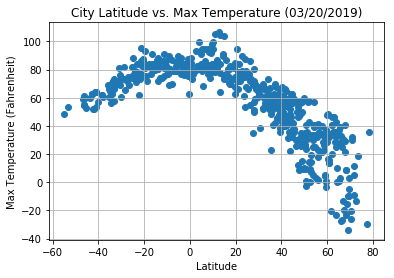

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Max Temp(F)"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({dt_str})" )
plt.ylabel("Max Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsMaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

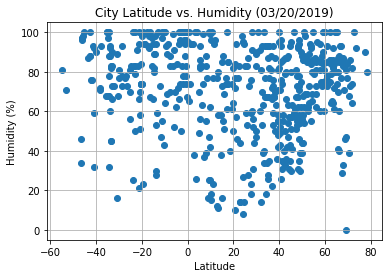

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({dt_str})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

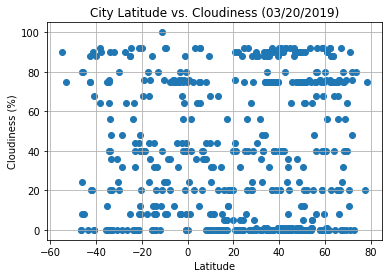

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({dt_str})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

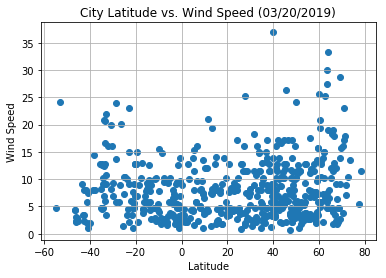

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({dt_str})")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CityLatitudeVsWindSpeed.png")

# Show plot
plt.show()